# Atividade 4

In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
seed = 20

## Load and reading the data


In [29]:
dataset = pd.read_csv('../Dataset/dataset.csv')

## Seperate teh data into Features and Target

In [30]:
X = dataset.drop('target', axis=1)
y = dataset.loc[:,'target']

### Separation of Data for Training and Testing with 80:20 ratio

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## ML algorithms

In [32]:
scoring = 'accuracy'
cv = 10
folds = StratifiedKFold(n_splits=cv, random_state=None)

## 1. KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(knn_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(knn_scores), np.std(knn_scores)))

[0.99820305 0.99730458 0.99550764 0.99371069 0.99460916 0.99460916
 0.99730458 0.99730458 0.9955036  0.99460432]
Mean: 0.99587, std: 0.00146


In [47]:
KNN_score = [0.99820305, 0.99730458, 0.99550764 ,0.99371069, 0.99460916, 0.99460916,
 0.99730458, 0.99730458 ,0.9955036 , 0.99460432]

## 2. DecisionTreeClassifier

In [41]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, random_state=seed)
tree_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(tree_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(tree_scores), np.std(tree_scores)))

[0.98113208 0.9802336  0.97124888 0.95777179 0.96855346 0.9640611
 0.96855346 0.96945193 0.97571942 0.96852518]
Mean: 0.97053, std: 0.00672


In [46]:
DT_score = [0.98113208 ,0.9802336 , 0.97124888 ,0.95777179 ,0.96855346 ,0.9640611,
 0.96855346, 0.96945193, 0.97571942, 0.96852518]

## 3. RandomForestClassifier

In [42]:
forest = RandomForestClassifier(n_estimators=110, random_state=seed)
forest_scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(forest_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(forest_scores), np.std(forest_scores)))

[0.99281222 0.99640611 0.99281222 0.99550764 0.99101527 0.9901168
 0.99460916 0.99730458 0.98741007 0.99190647]
Mean: 0.99299, std: 0.00289


In [45]:
RF_score  =[0.99281222 ,0.99640611, 0.99281222, 0.99550764 ,0.99101527, 0.9901168,0.99460916, 0.99730458, 0.98741007 ,0.99190647]


## 4. MLPClassifier

In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(55, 55, 50), activation='tanh', solver='lbfgs', max_iter=2000, random_state=seed)
mlp_scores = cross_val_score(estimator=mlp, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(mlp_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(mlp_scores), np.std(mlp_scores)))

[0.99730458 0.99281222 0.99281222 0.99550764 0.99550764 0.9901168
 0.99371069 0.99550764 0.99460432 0.99190647]
Mean: 0.99398, std: 0.00201


In [44]:
mlp_scores = [0.99730458, 0.99281222, 0.99281222, 0.99550764, 0.99550764, 0.9901168, 0.99371069, 0.99550764, 0.99460432, 0.99190647]


## statistical test check if the samples follow a normal distribution

In [60]:
def normality_test(sample, sample_name):
    stat, p = shapiro(sample)
    alpha = 0.05
    if p > alpha:
        print(sample_name + ': Normal distribution (fail to reject H0)')
    else:
        print(sample_name + ' No normal distribution (reject H0)')

In [61]:
clf_results = [(knn_scores, 'KNN'), (tree_scores, 'DF'), (forest_scores, 'RF'), (mlp_scores, 'MLP')]

for clf_result in clf_results:
    normality_test(clf_result[0], clf_result[1])

KNN: Normal distribution (fail to reject H0)
DF: Normal distribution (fail to reject H0)
RF: Normal distribution (fail to reject H0)
MLP: Normal distribution (fail to reject H0)


### Statistical test to compare all distributions
Given that some samples do not follow the normal distribution, and their sizes (10 for each), the non-parametric Kruskal-Wallis test will be conducted to verify if the samples follow the same distribution

In [52]:
stat, p = kruskal(knn_scores, tree_scores, forest_scores, mlp_scores)
print(stat, p)
alpha = 0.05

if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

25.218386914833637 1.3899297618593223e-05
Different distributions (reject H0)



## Pairwise Comparison
The result of the statistical test indicates that the samples do not follow the same distribution. Pairwise tests will be conducted to identify which classifiers have different results based on the statistics, and then select the best one.

In [62]:
def compare_samples(pair):
    sample_names = pair[0][1] + ' x ' + pair[1][1]
    sample_1 = pair[0][0]
    sample_2 = pair[1][0]
    stat, p = mannwhitneyu(sample_1, sample_2)
    alpha = 0.05
    if p > alpha:
        print(sample_names + ': Same distributions (fail to reject H0). p-value: ' + str(p))
    else:
        print(sample_names + ': Different distributions (reject H0). p-value: '+ str(p))

In [64]:
import itertools

for pair in itertools.combinations((clf_results), 2):
    compare_samples(pair)

KNN x DF: Different distributions (reject H0). p-value: 0.00017661101166893502
KNN x RF: Different distributions (reject H0). p-value: 0.036490193433198544
KNN x MLP: Same distributions (fail to reject H0). p-value: 0.07456201278798391
DF x RF: Different distributions (reject H0). p-value: 0.0001806347208075351
DF x MLP: Different distributions (reject H0). p-value: 0.00017661101166893502
RF x MLP: Same distributions (fail to reject H0). p-value: 0.4263100165939262


#### The decision tree was the only classifier that showed a different distribution compared to the others, according to the statistical test.

### Analysis of Distribution of Results

In [65]:
results = pd.DataFrame([knn_scores, tree_scores, forest_scores, mlp_scores])
results.index = ['KNN', 'DT', 'RF', 'MLP']
results

,0,1,2,3,4,5,6,7,8,9
KNN,0.998203,0.997305,0.995508,0.993711,0.994609,0.994609,0.997305,0.997305,0.995504,0.994604
DT,0.981132,0.980234,0.971249,0.957772,0.968553,0.964061,0.968553,0.969452,0.975719,0.968525
RF,0.992812,0.996406,0.992812,0.995508,0.991015,0.990117,0.994609,0.997305,0.987410,0.991906
MLP,0.997305,0.992812,0.992812,0.995508,0.995508,0.990117,0.993711,0.995508,0.994604,0.991906


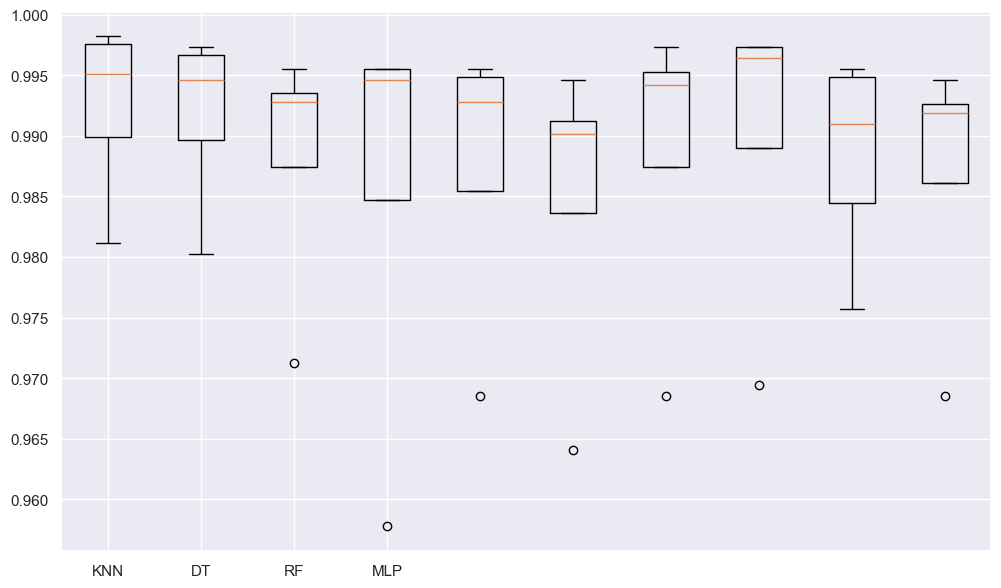

In [66]:
fig, ax = plt.subplots(figsize=(12,7))

ax.boxplot(results)
plt.xticks([1, 2, 3, 4], ['KNN', 'DT', 'RF', 'MLP'])
# plt.savefig('boxplot_results.png')
plt.show()

### Evaluation on the Training Set
After conducting statistical tests and analyzing the results with a box plot, the KNN classifier was selected. This decision was based on it achieving the second highest mean accuracy and being simpler and faster compared to the other classifiers.

Accuracy: 0.99676
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       512
         2.0       1.00      1.00      1.00       605
         3.0       0.99      0.99      0.99       302
         4.0       1.00      1.00      1.00       404
         5.0       0.99      1.00      1.00       593
         6.0       1.00      1.00      1.00       366

    accuracy                           1.00      2782
   macro avg       1.00      1.00      1.00      2782
weighted avg       1.00      1.00      1.00      2782



<Axes: >

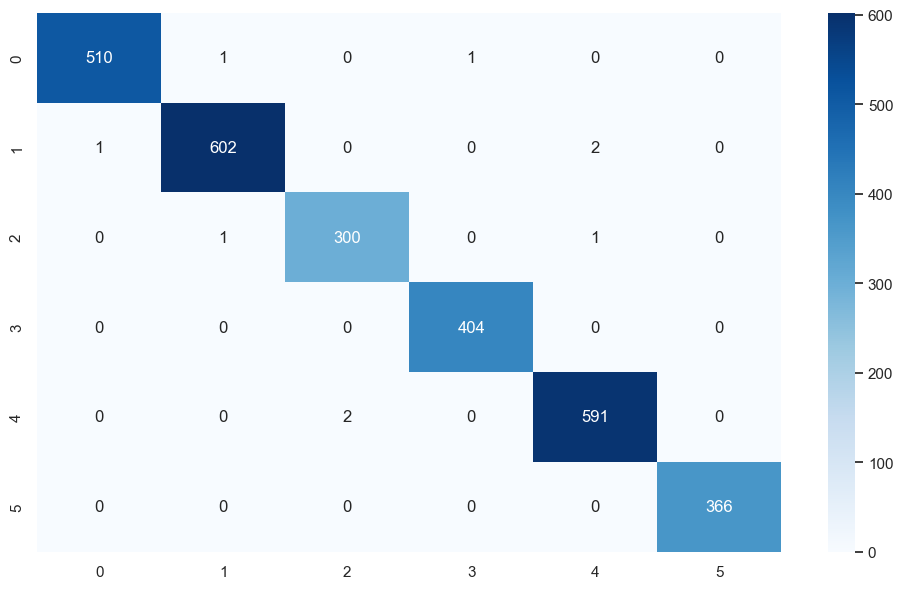

In [67]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print('Accuracy: %.5f' % accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues', ax=ax, fmt='d')
# plt.savefig('confusion_matrix_voting.png')